In [1]:
import itertools
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import pylab as pl
from scipy import stats
from sklearn import preprocessing
%matplotlib inline

In [2]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-17 19:58:46--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  43.5MB/s   in 1.6s   

2020-09-17 19:58:48 (43.5 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [3]:
full_df = pd.read_csv('Data-Collisions.csv')
full_df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
full_df.corr()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
SEVERITYCODE,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
X,0.010309,1.000000,-0.160262,0.009956,0.010309,0.010300,0.120754,0.010309,0.012887,0.011304,-0.001752,-0.012168,0.010904,-0.001016,-0.001618,0.013586
Y,0.017737,-0.160262,1.000000,-0.023848,-0.027396,-0.027415,-0.114935,0.017737,-0.013850,0.010178,0.026304,0.017058,-0.019694,-0.006958,0.004618,0.009508
OBJECTID,0.020131,0.009956,-0.023848,1.000000,0.946383,0.945837,0.046929,0.020131,-0.062333,0.024604,0.034432,-0.094280,-0.037094,0.969276,0.028076,0.056046
INCKEY,0.022065,0.010309,-0.027396,0.946383,1.000000,0.999996,0.048524,0.022065,-0.061500,0.024918,0.031342,-0.107528,-0.027617,0.990571,0.019701,0.048179
COLDETKEY,0.022079,0.010300,-0.027415,0.945837,0.999996,1.000000,0.048499,0.022079,-0.061403,0.024914,0.031296,-0.107598,-0.027461,0.990571,0.019586,0.048063
INTKEY,0.006553,0.120754,-0.114935,0.046929,0.048524,0.048499,1.000000,0.006553,0.001886,-0.004784,0.000531,-0.012929,0.007114,0.032604,-0.010510,0.018420
SEVERITYCODE.1,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
PERSONCOUNT,0.130949,0.012887,-0.013850,-0.062333,-0.061500,-0.061403,0.001886,0.130949,1.000000,-0.023464,-0.038809,0.380523,-0.128960,0.011784,-0.021383,-0.032258
PEDCOUNT,0.246338,0.011304,0.010178,0.024604,0.024918,0.024914,-0.004784,0.246338,-0.023464,1.000000,-0.016920,-0.261285,0.260393,0.021461,0.001810,0.565326


In [9]:
train_df = full_df[['SEVERITYCODE', 'ST_COLDESC']]
train_df['SEVERITYCODE'].replace(1, 0, inplace = True)
train_df['SEVERITYCODE'].replace(2, 1, inplace = True)
train_df = train_df[['SEVERITYCODE','ST_COLDESC']]
train_df.dropna(inplace = True)
train_df.shape

(189769, 2)

In [10]:
accidents_group_df = pd.DataFrame({'Number of Total Accidents': train_df.groupby(['ST_COLDESC']).size()}).reset_index()
train_df['ST_COLDESC'].value_counts()
accidents_group_df.head()

,ST_COLDESC,Number of Total Accidents
0,All Other Multi Vehicle,8
1,All other non-collision,108
2,Breakage of any part of the vehicle resulting ...,34
3,"Domestic animal other (cat, dog, etc)",32
4,Entering at angle,34674


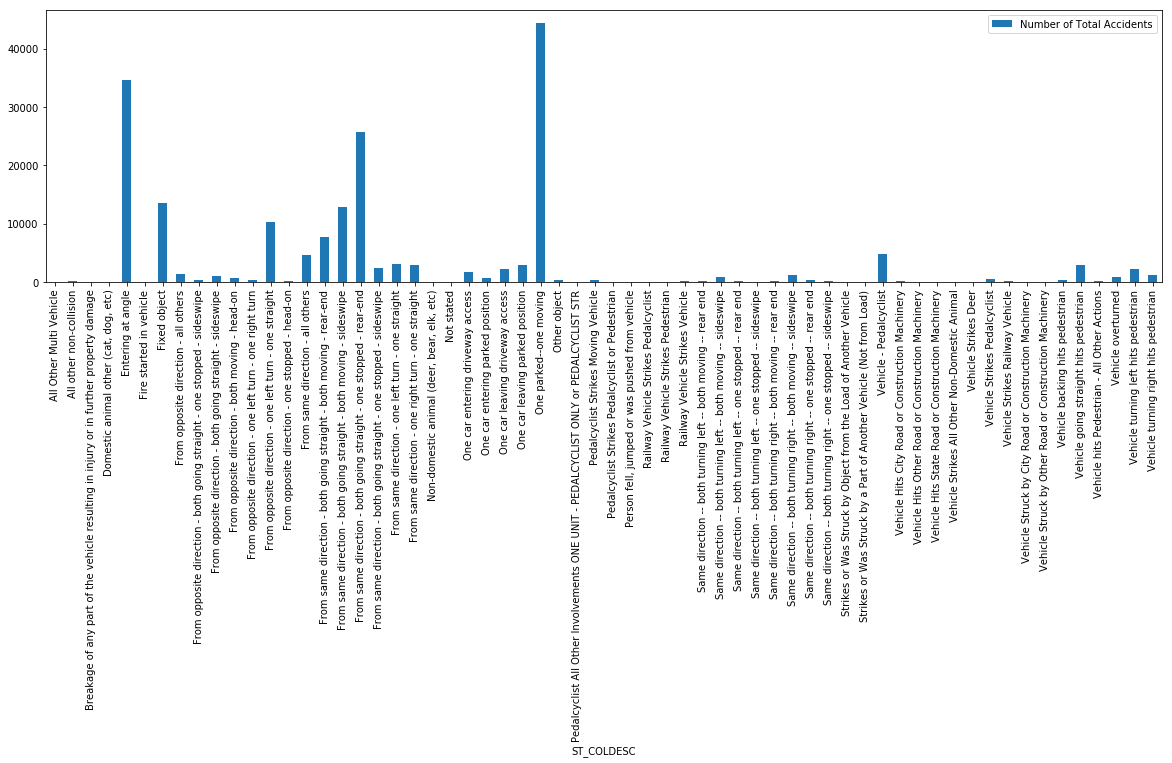

In [11]:
accidents_group_df.plot.bar(x = 'ST_COLDESC', y = 'Number of Total Accidents', figsize = (20,5))

In [12]:
injury_df = train_df.copy()
injury_df = injury_df[injury_df.SEVERITYCODE != 0]
injury_df.head()

,SEVERITYCODE,ST_COLDESC
0,1,Entering at angle
4,1,Entering at angle
7,1,Vehicle Strikes Pedalcyclist
9,1,Entering at angle
14,1,From opposite direction - all others


In [13]:
injury_accidents_group_df = pd.DataFrame({'Number of Injury Accidents': injury_df.groupby(['ST_COLDESC']).size()}).reset_index()
injury_df['ST_COLDESC'].value_counts()
injury_accidents_group_df.head()

,ST_COLDESC,Number of Injury Accidents
0,All Other Multi Vehicle,3
1,All other non-collision,32
2,Breakage of any part of the vehicle resulting ...,9
3,"Domestic animal other (cat, dog, etc)",2
4,Entering at angle,13624


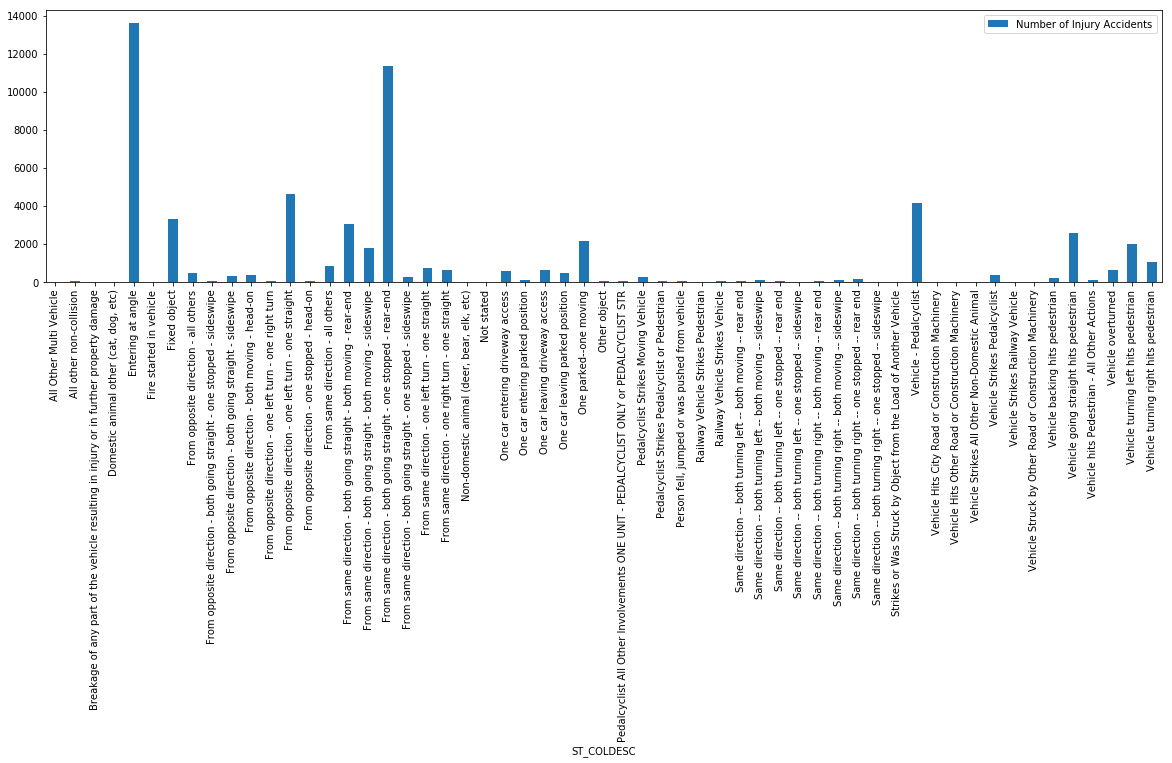

In [14]:
injury_accidents_group_df.plot.bar(x = 'ST_COLDESC', y = 'Number of Injury Accidents', figsize = (20,5))

In [15]:
result_location = pd.merge(accidents_group_df, injury_accidents_group_df, how='inner', on=['ST_COLDESC'])
result_location.head()

,ST_COLDESC,Number of Total Accidents,Number of Injury Accidents
0,All Other Multi Vehicle,8,3
1,All other non-collision,108,32
2,Breakage of any part of the vehicle resulting ...,34,9
3,"Domestic animal other (cat, dog, etc)",32,2
4,Entering at angle,34674,13624


In [16]:
result_location

,ST_COLDESC,Number of Total Accidents,Number of Injury Accidents
0,All Other Multi Vehicle,8,3
1,All other non-collision,108,32
2,Breakage of any part of the vehicle resulting ...,34,9
3,"Domestic animal other (cat, dog, etc)",32,2
4,Entering at angle,34674,13624
5,Fire started in vehicle,7,1
6,Fixed object,13554,3291
7,From opposite direction - all others,1302,448
8,From opposite direction - both going straight ...,231,52
9,From opposite direction - both going straight ...,1039,282


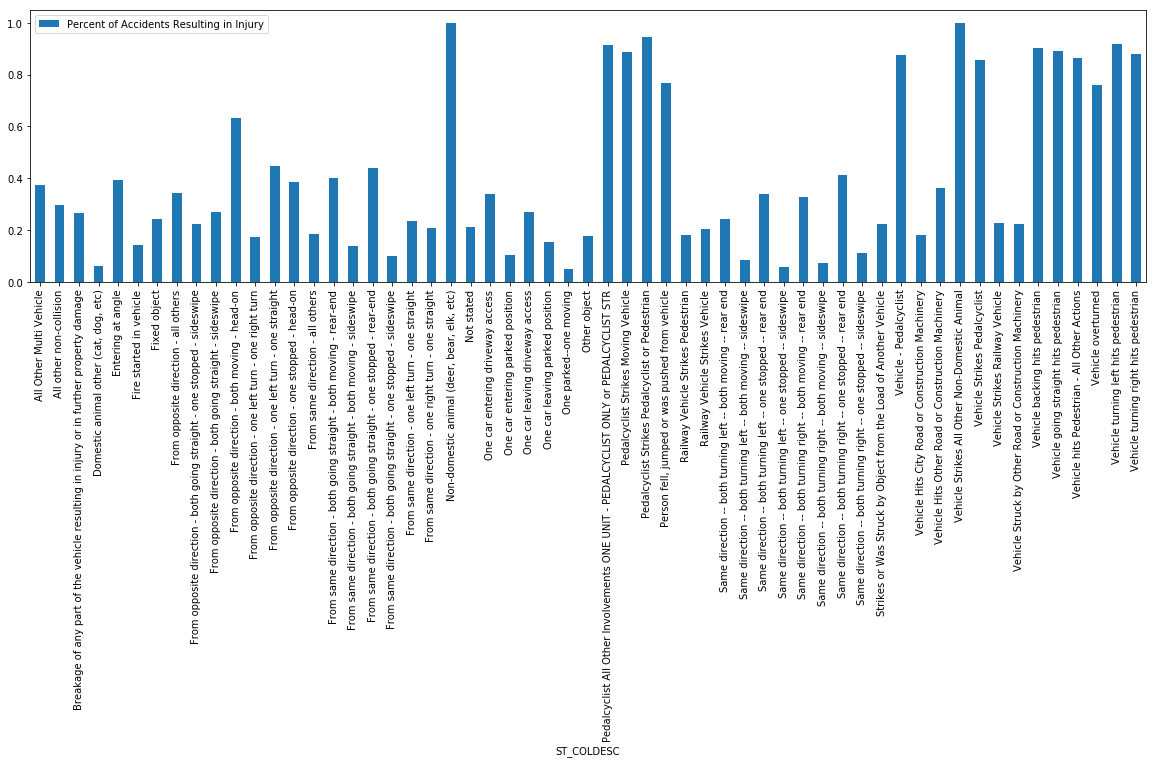

In [17]:
injury_over_total_location = result_location["Number of Injury Accidents"] / result_location["Number of Total Accidents"]
result_location["Percent of Accidents Resulting in Injury"] = injury_over_total_location
result_location.plot.bar(x = 'ST_COLDESC', y = 'Percent of Accidents Resulting in Injury', figsize = (20,5))

In [18]:
location_onehot = train_df.copy()
location_onehot = pd.concat([location_onehot, pd.get_dummies(location_onehot['ST_COLDESC'])], axis=1)
location_onehot.drop(['ST_COLDESC'], axis = 1, inplace = True)
location_onehot.head()

,SEVERITYCODE,All Other Multi Vehicle,All other non-collision,Breakage of any part of the vehicle resulting in injury or in further property damage,"Domestic animal other (cat, dog, etc)",Entering at angle,Fire started in vehicle,Fixed object,From opposite direction - all others,From opposite direction - both going straight - one stopped - sideswipe,...,Vehicle Strikes Pedalcyclist,Vehicle Strikes Railway Vehicle,Vehicle Struck by City Road or Construction Machinery,Vehicle Struck by Other Road or Construction Machinery,Vehicle backing hits pedestrian,Vehicle going straight hits pedestrian,Vehicle hits Pedestrian - All Other Actions,Vehicle overturned,Vehicle turning left hits pedestrian,Vehicle turning right hits pedestrian
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
location_onehot_final = location_onehot.copy()
location_onehot_final.drop(['SEVERITYCODE'], axis = 1, inplace = True)
location_onehot_final[0:5]

,All Other Multi Vehicle,All other non-collision,Breakage of any part of the vehicle resulting in injury or in further property damage,"Domestic animal other (cat, dog, etc)",Entering at angle,Fire started in vehicle,Fixed object,From opposite direction - all others,From opposite direction - both going straight - one stopped - sideswipe,From opposite direction - both going straight - sideswipe,...,Vehicle Strikes Pedalcyclist,Vehicle Strikes Railway Vehicle,Vehicle Struck by City Road or Construction Machinery,Vehicle Struck by Other Road or Construction Machinery,Vehicle backing hits pedestrian,Vehicle going straight hits pedestrian,Vehicle hits Pedestrian - All Other Actions,Vehicle overturned,Vehicle turning left hits pedestrian,Vehicle turning right hits pedestrian
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
x_location = location_onehot_final
x_location = preprocessing.StandardScaler().fit_transform(x_location)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [21]:
y_location = location_onehot["SEVERITYCODE"].values
y_location[0:5]

array([1, 0, 0, 0, 1])

In [22]:
from sklearn.model_selection import train_test_split

x_train_location, x_test_location, y_train_location, y_test_location = train_test_split(x_location, y_location, test_size=0.2, random_state=4)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR_location = LogisticRegression(C = 0.01, class_weight = 'balanced', solver = 'sag').fit(x_train_location, y_train_location)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [25]:
yhatLR_location = LR_location.predict(x_test_location)
yhat_prob_location = LR_location.predict_proba(x_test_location)

Confusion matrix, without normalization
[[16652  9881]
 [ 2272  9149]]


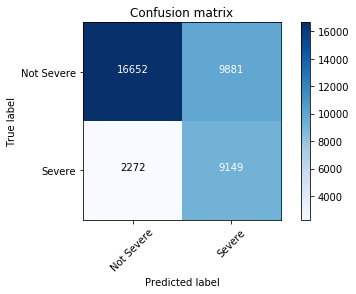

In [136]:
cnf_matrix_location = confusion_matrix(y_test_location, yhatLR_location)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix_location, classes=['Not Severe','Severe'],normalize= False,  title='Confusion matrix')

In [27]:
from sklearn.metrics import accuracy_score, f1_score, log_loss, classification_report, confusion_matrix, jaccard_similarity_score

location_LRyhat_accuracy = LR_location.predict(location_onehot_final)
location_LRyhat_prob_accuracy = LR_location.predict_proba(location_onehot_final)
print("Logistic Regression Jaccard index: %.2f" % jaccard_similarity_score(y_location, location_LRyhat_accuracy))
print("Logistic Regression F1-score: %.2f" % f1_score(y_location, location_LRyhat_accuracy, average='weighted') )
print("Logistic Regression Log-Loss index: %.2f" % log_loss(y_location, location_LRyhat_prob_accuracy))

Logistic Regression Jaccard index: 0.72
Logistic Regression F1-score: 0.70
Logistic Regression Log-Loss index: 0.58


In [28]:
from sklearn.tree import DecisionTreeClassifier
#initializing tree
DecisionTree = DecisionTreeClassifier(criterion="entropy")

#fitting model
DecisionTree.fit(x_train_location, y_train_location)

#getting predictions
predTree = DecisionTree.predict(x_test_location)

In [29]:
!pip install graphviz
!pip install pydotplus
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

In [30]:
#dot_data = StringIO()
#filename = "Data-Collisions.csv"
#featureNames = df.columns[0:62]
#targetNames = df["loan_status"].unique().tolist()
#out=tree.export_graphviz(DecisionTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png(filename)
#img = mpimg.imread(filename)
#plt.figure(figsize=(100, 200))
#plt.imshow(img,interpolation='nearest')

In [31]:
decision_yhat = DecisionTree.predict(location_onehot_final)
print("Decision Tree Jaccard index: %.2f" % jaccard_similarity_score(y_location, decision_yhat))
print("Decision Tree F1-score: %.2f" % f1_score(y_location, decision_yhat, average='weighted') )

Decision Tree Jaccard index: 0.70
Decision Tree F1-score: 0.57


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [32]:
weather_total_df = full_df[['SEVERITYCODE', 'WEATHER']]
weather_total_df.dropna(axis = 0, inplace = True)
weather_total_df.shape
weather_total_df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,SEVERITYCODE,WEATHER
0,2,Overcast
1,1,Raining
2,1,Overcast
3,1,Clear
4,2,Raining


In [33]:
weather_total_df['SEVERITYCODE'].replace(1, 0, inplace = True)
weather_total_df['SEVERITYCODE'].replace(2, 1, inplace = True)
weather_total_df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,SEVERITYCODE,WEATHER
0,1,Overcast
1,0,Raining
2,0,Overcast
3,0,Clear
4,1,Raining


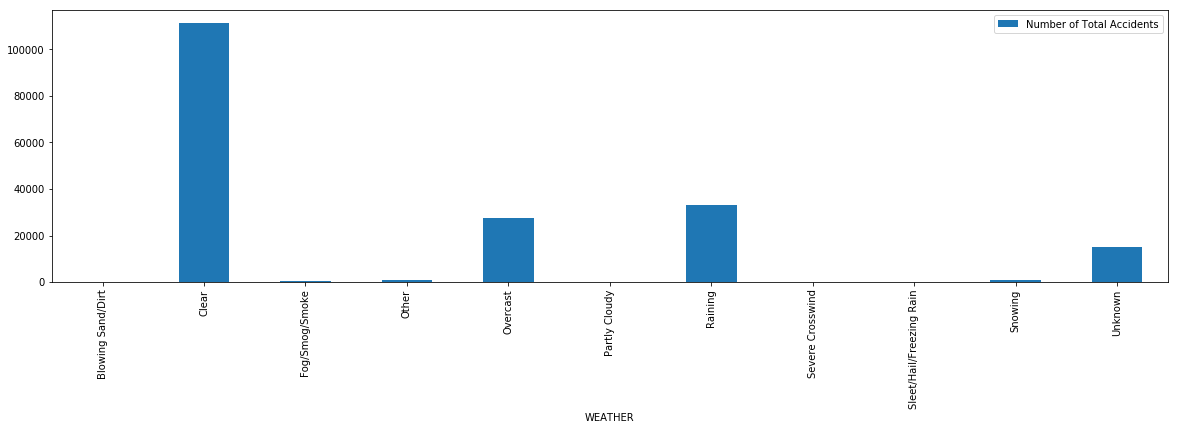

In [34]:
weather_group_df = pd.DataFrame({'Number of Total Accidents': weather_total_df.groupby(['WEATHER']).size()}).reset_index()
weather_group_df['WEATHER'].value_counts()
weather_group_df.head()
weather_group_df.plot.bar(x = 'WEATHER', y = 'Number of Total Accidents', figsize = (20,5))

In [35]:
weather_accidents_df = weather_total_df[weather_total_df.SEVERITYCODE != 0]
weather_accidents_df.head()

,SEVERITYCODE,WEATHER
0,1,Overcast
4,1,Raining
7,1,Clear
9,1,Clear
14,1,Clear


In [36]:
weather_accidents_group_df = pd.DataFrame({'Number of Injury Accidents': weather_accidents_df.groupby(['WEATHER']).size()}).reset_index()
weather_accidents_df['WEATHER'].value_counts()
weather_accidents_group_df.head()

,WEATHER,Number of Injury Accidents
0,Blowing Sand/Dirt,15
1,Clear,35840
2,Fog/Smog/Smoke,187
3,Other,116
4,Overcast,8745


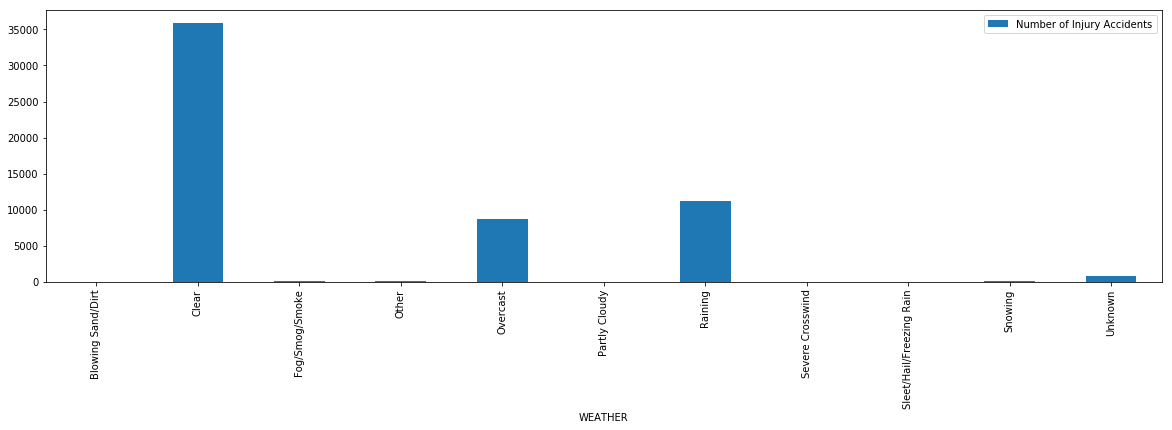

In [37]:
weather_accidents_group_df.plot.bar(x = 'WEATHER', y = 'Number of Injury Accidents', figsize = (20,5))

In [38]:
result_weather = pd.merge(weather_group_df, weather_accidents_group_df, how='inner', on=['WEATHER'])
result_weather.head()

,WEATHER,Number of Total Accidents,Number of Injury Accidents
0,Blowing Sand/Dirt,56,15
1,Clear,111135,35840
2,Fog/Smog/Smoke,569,187
3,Other,832,116
4,Overcast,27714,8745


In [39]:
injury_over_total_weather = result_weather["Number of Injury Accidents"] / result_weather["Number of Total Accidents"]
result_weather["Percent of Accidents Resulting in Injury"] = injury_over_total_weather
result_weather

,WEATHER,Number of Total Accidents,Number of Injury Accidents,Percent of Accidents Resulting in Injury
0,Blowing Sand/Dirt,56,15,0.267857
1,Clear,111135,35840,0.322491
2,Fog/Smog/Smoke,569,187,0.328647
3,Other,832,116,0.139423
4,Overcast,27714,8745,0.315544
5,Partly Cloudy,5,3,0.600000
6,Raining,33145,11176,0.337185
7,Severe Crosswind,25,7,0.280000
8,Sleet/Hail/Freezing Rain,113,28,0.247788
9,Snowing,907,171,0.188534


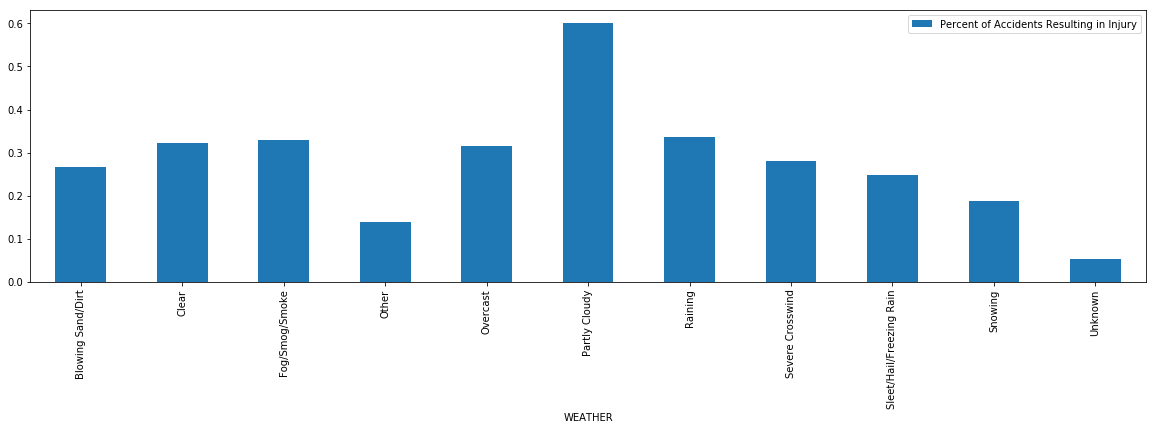

In [40]:
result_weather.plot.bar(x = 'WEATHER', y = 'Percent of Accidents Resulting in Injury', figsize = (20,5))

In [41]:
weather_onehot = weather_total_df.copy()
weather_onehot = pd.concat([weather_onehot, pd.get_dummies(weather_onehot['WEATHER'])], axis=1)
weather_onehot.drop(['WEATHER'], axis = 1, inplace = True)
weather_onehot.head()

,SEVERITYCODE,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Unknown
0,1,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,0,0


In [42]:
weather_onehot_final = weather_onehot.copy()
weather_onehot_final.drop(['SEVERITYCODE'], axis = 1, inplace = True)
weather_onehot_final[0:5]

,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Unknown
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0


In [43]:
x_weather = weather_onehot_final
x_weather = preprocessing.StandardScaler().fit_transform(x_weather)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [44]:
y_weather = weather_onehot["SEVERITYCODE"].values
y_weather[0:5]

array([1, 0, 0, 0, 1])

In [45]:
from sklearn.model_selection import train_test_split

x_train_weather, x_test_weather, y_train_weather, y_test_weather = train_test_split(x_weather, y_weather, test_size=0.2, random_state=4)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR_weather = LogisticRegression(C = 0.01, solver = 'liblinear').fit(x_train_weather, y_train_weather)

In [47]:
yhatLR_weather = LR_weather.predict(x_test_weather)
yhat_prob_weather = LR_weather.predict_proba(x_test_weather)

Confusion matrix, without normalization
[[26565     0]
 [11354     0]]


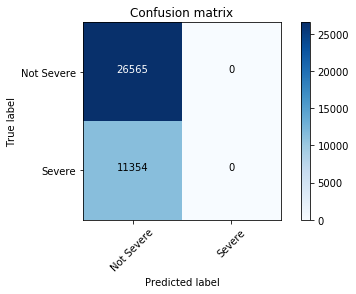

In [135]:
cnf_matrix_weather = confusion_matrix(y_test_weather, yhatLR_weather)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix_weather, classes=['Not Severe','Severe'],normalize= False,  title='Confusion matrix')

In [49]:
from sklearn.metrics import accuracy_score, f1_score, log_loss, classification_report, confusion_matrix, jaccard_similarity_score

weather_LRyhat_accuracy = LR_weather.predict(weather_onehot_final)
weather_LRyhat_prob_accuracy = LR_weather.predict_proba(weather_onehot_final)
print("Logistic Regression Jaccard index: %.2f" % jaccard_similarity_score(y_weather, weather_LRyhat_accuracy))
print("Logistic Regression F1-score: %.2f" % f1_score(y_weather, weather_LRyhat_accuracy, average='weighted') )
print("Logistic Regression Log-Loss index: %.2f" % log_loss(y_weather, weather_LRyhat_prob_accuracy))

Logistic Regression Jaccard index: 0.70
Logistic Regression F1-score: 0.57
Logistic Regression Log-Loss index: 0.60


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [50]:
light_total_df = full_df[['SEVERITYCODE', 'LIGHTCOND']]
light_total_df.dropna(axis = 0, inplace = True)
light_total_df.shape

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


(189503, 2)

In [51]:
light_total_df['SEVERITYCODE'].replace(1, 0, inplace = True)
light_total_df['SEVERITYCODE'].replace(2, 1, inplace = True)
light_total_df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,SEVERITYCODE,LIGHTCOND
0,1,Daylight
1,0,Dark - Street Lights On
2,0,Daylight
3,0,Daylight
4,1,Daylight


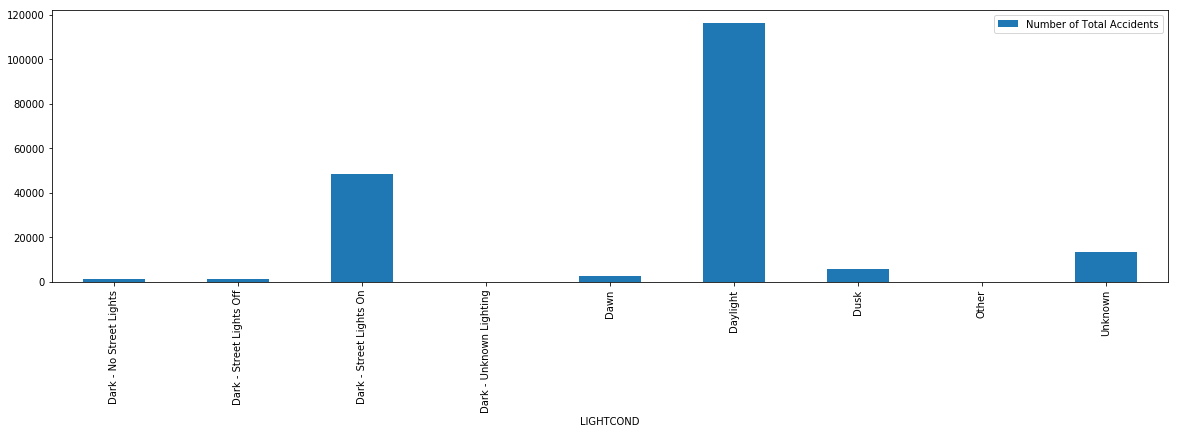

In [52]:
light_group_df = pd.DataFrame({'Number of Total Accidents': light_total_df.groupby(['LIGHTCOND']).size()}).reset_index()
light_group_df['LIGHTCOND'].value_counts()
light_group_df.head()
light_group_df.plot.bar(x = 'LIGHTCOND', y = 'Number of Total Accidents', figsize = (20,5))

In [53]:
light_accidents_df = light_total_df[light_total_df.SEVERITYCODE != 0]
light_accidents_df.head()

,SEVERITYCODE,LIGHTCOND
0,1,Daylight
4,1,Daylight
7,1,Daylight
9,1,Daylight
14,1,Dark - Street Lights On


In [54]:
light_accidents_group_df = pd.DataFrame({'Number of Injury Accidents': light_accidents_df.groupby(['LIGHTCOND']).size()}).reset_index()
light_accidents_df['LIGHTCOND'].value_counts()
light_accidents_group_df.head()

,LIGHTCOND,Number of Injury Accidents
0,Dark - No Street Lights,334
1,Dark - Street Lights Off,316
2,Dark - Street Lights On,14475
3,Dark - Unknown Lighting,4
4,Dawn,824


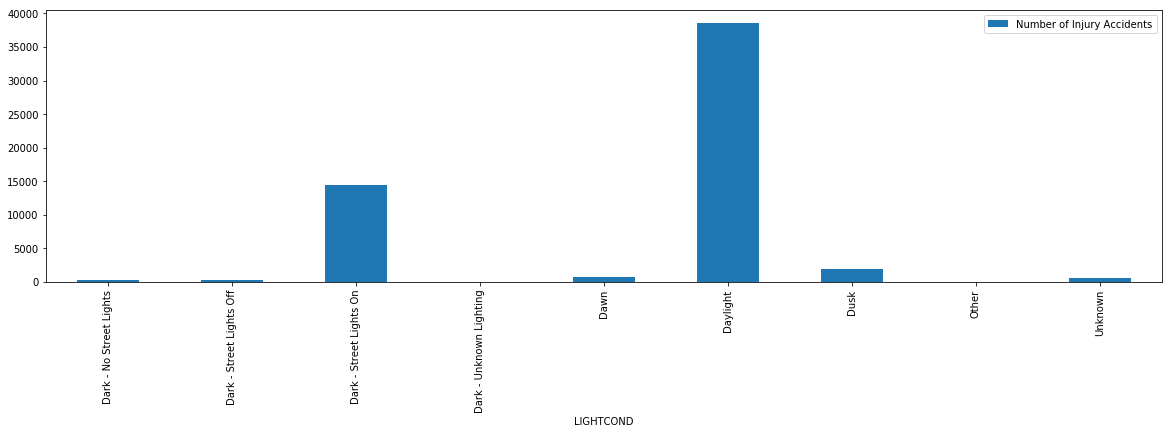

In [55]:
light_accidents_group_df.plot.bar(x = 'LIGHTCOND', y = 'Number of Injury Accidents', figsize = (20,5))

In [56]:
result_light = pd.merge(light_group_df, light_accidents_group_df, how='inner', on=['LIGHTCOND'])
result_light.head()

,LIGHTCOND,Number of Total Accidents,Number of Injury Accidents
0,Dark - No Street Lights,1537,334
1,Dark - Street Lights Off,1199,316
2,Dark - Street Lights On,48507,14475
3,Dark - Unknown Lighting,11,4
4,Dawn,2502,824


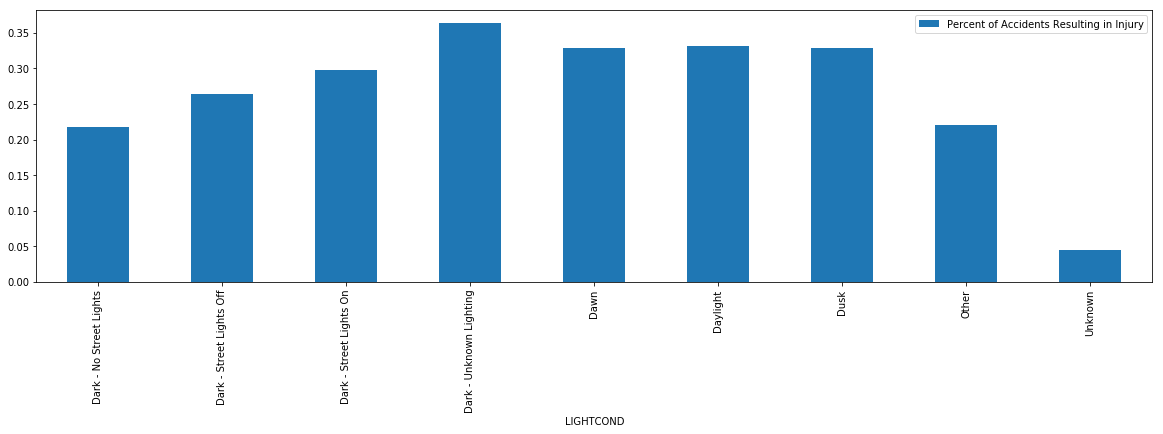

In [57]:
injury_over_total_light = result_light["Number of Injury Accidents"] / result_light["Number of Total Accidents"]
result_light["Percent of Accidents Resulting in Injury"] = injury_over_total_light
result_light.plot.bar(x = 'LIGHTCOND', y = 'Percent of Accidents Resulting in Injury', figsize = (20,5))

In [58]:
result_light

,LIGHTCOND,Number of Total Accidents,Number of Injury Accidents,Percent of Accidents Resulting in Injury
0,Dark - No Street Lights,1537,334,0.217306
1,Dark - Street Lights Off,1199,316,0.263553
2,Dark - Street Lights On,48507,14475,0.298411
3,Dark - Unknown Lighting,11,4,0.363636
4,Dawn,2502,824,0.329337
5,Daylight,116137,38544,0.331884
6,Dusk,5902,1944,0.329380
7,Other,235,52,0.221277
8,Unknown,13473,605,0.044905


In [59]:
light_onehot = light_total_df.copy()
light_onehot = pd.concat([light_onehot, pd.get_dummies(light_onehot['LIGHTCOND'])], axis=1)
light_onehot.drop(['LIGHTCOND'], axis = 1, inplace = True)
light_onehot.head()

,SEVERITYCODE,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Unknown
0,1,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0


In [60]:
light_onehot_final = light_onehot.copy()
light_onehot_final.drop(['SEVERITYCODE'], axis = 1, inplace = True)
light_onehot_final[0:5]

,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Unknown
0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0


In [61]:
x_light = light_onehot_final
x_light = preprocessing.StandardScaler().fit_transform(x_light)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [62]:
y_light = light_onehot["SEVERITYCODE"].values
y_light[0:5]

array([1, 0, 0, 0, 1])

In [63]:
from sklearn.model_selection import train_test_split

x_train_light, x_test_light, y_train_light, y_test_light = train_test_split(x_light, y_light, test_size=0.2, random_state=4)

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR_light = LogisticRegression(C = 0.01, solver = 'liblinear').fit(x_train_light, y_train_light)

In [65]:
yhatLR_light = LR_light.predict(x_test_light)
yhat_prob_light = LR_light.predict_proba(x_test_light)

Confusion matrix, without normalization
[[26433     0]
 [11468     0]]


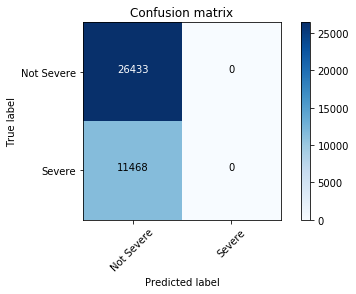

In [134]:
cnf_matrix_light = confusion_matrix(y_test_light, yhatLR_light)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix_light, classes=['Not Severe','Severe'],normalize= False,  title='Confusion matrix')

In [67]:
from sklearn.metrics import accuracy_score, f1_score, log_loss, classification_report, confusion_matrix, jaccard_similarity_score

light_LRyhat_accuracy = LR_light.predict(light_onehot_final)
light_LRyhat_prob_accuracy = LR_light.predict_proba(light_onehot_final)
print("Logistic Regression Jaccard index: %.2f" % jaccard_similarity_score(y_light, light_LRyhat_accuracy))
print("Logistic Regression F1-score: %.2f" % f1_score(y_light, light_LRyhat_accuracy, average='weighted') )
print("Logistic Regression Log-Loss index: %.2f" % log_loss(y_light, light_LRyhat_prob_accuracy))

Logistic Regression Jaccard index: 0.70
Logistic Regression F1-score: 0.57
Logistic Regression Log-Loss index: 0.60


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [68]:
road_total_df = full_df[['SEVERITYCODE', 'ROADCOND']]
road_total_df.dropna(axis = 0, inplace = True)
road_total_df.shape

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


(189661, 2)

In [69]:
road_total_df['SEVERITYCODE'].replace(1, 0, inplace = True)
road_total_df['SEVERITYCODE'].replace(2, 1, inplace = True)
road_total_df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,SEVERITYCODE,ROADCOND
0,1,Wet
1,0,Wet
2,0,Dry
3,0,Dry
4,1,Wet


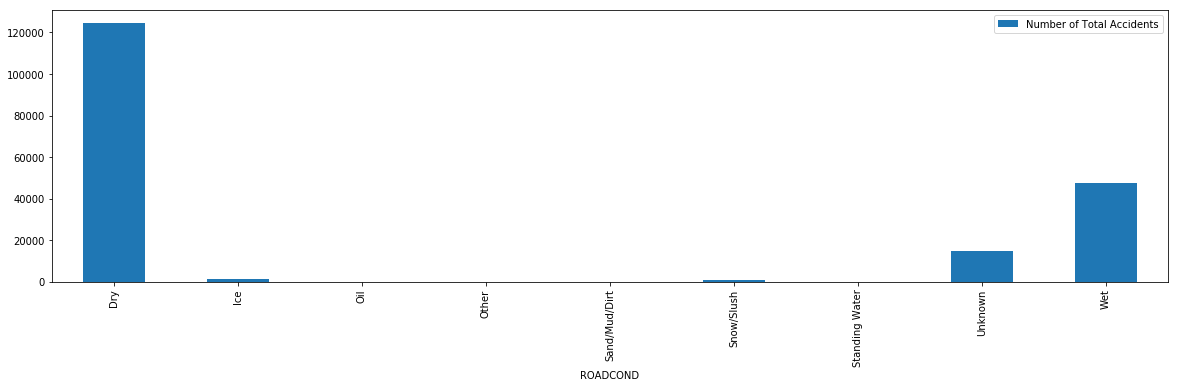

In [70]:
road_group_df = pd.DataFrame({'Number of Total Accidents': road_total_df.groupby(['ROADCOND']).size()}).reset_index()
road_group_df['ROADCOND'].value_counts()
road_group_df.head()
road_group_df.plot.bar(x = 'ROADCOND', y = 'Number of Total Accidents', figsize = (20,5))

In [71]:
road_accidents_df = road_total_df[road_total_df.SEVERITYCODE != 0]
road_accidents_df.head()

,SEVERITYCODE,ROADCOND
0,1,Wet
4,1,Wet
7,1,Dry
9,1,Dry
14,1,Dry


In [72]:
road_accidents_group_df = pd.DataFrame({'Number of Injury Accidents': road_accidents_df.groupby(['ROADCOND']).size()}).reset_index()
road_accidents_df['ROADCOND'].value_counts()
road_accidents_group_df

,ROADCOND,Number of Injury Accidents
0,Dry,40064
1,Ice,273
2,Oil,24
3,Other,43
4,Sand/Mud/Dirt,23
5,Snow/Slush,167
6,Standing Water,30
7,Unknown,749
8,Wet,15755


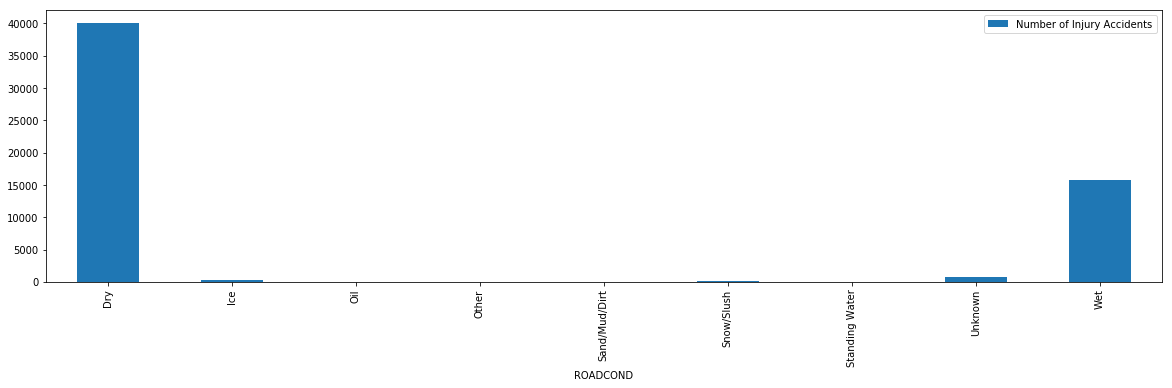

In [73]:
road_accidents_group_df.plot.bar(x = 'ROADCOND', y = 'Number of Injury Accidents', figsize = (20,5))

In [74]:
result_road = pd.merge(road_group_df, road_accidents_group_df, how='inner', on=['ROADCOND'])
result_road

,ROADCOND,Number of Total Accidents,Number of Injury Accidents
0,Dry,124510,40064
1,Ice,1209,273
2,Oil,64,24
3,Other,132,43
4,Sand/Mud/Dirt,75,23
5,Snow/Slush,1004,167
6,Standing Water,115,30
7,Unknown,15078,749
8,Wet,47474,15755


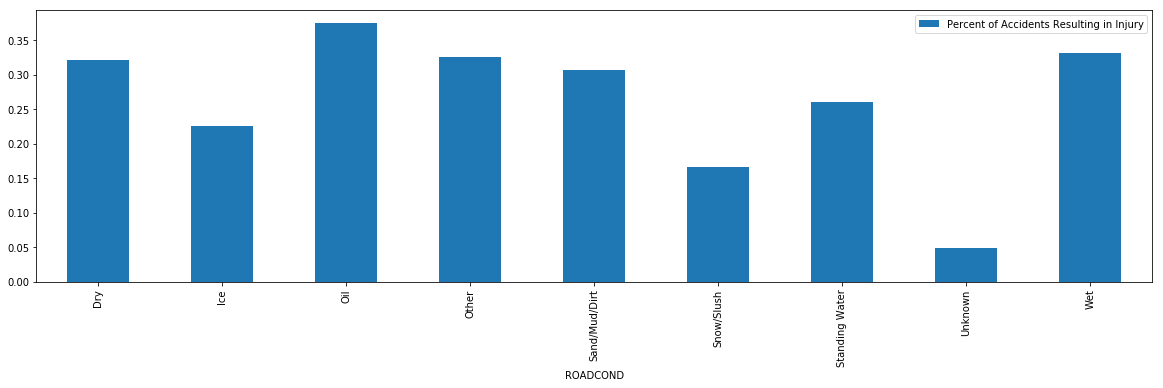

In [75]:
injury_over_total_road = result_road["Number of Injury Accidents"] / result_road["Number of Total Accidents"]
result_road["Percent of Accidents Resulting in Injury"] = injury_over_total_road
result_road.plot.bar(x = 'ROADCOND', y = 'Percent of Accidents Resulting in Injury', figsize = (20,5))

In [76]:
result_road

,ROADCOND,Number of Total Accidents,Number of Injury Accidents,Percent of Accidents Resulting in Injury
0,Dry,124510,40064,0.321773
1,Ice,1209,273,0.225806
2,Oil,64,24,0.375000
3,Other,132,43,0.325758
4,Sand/Mud/Dirt,75,23,0.306667
5,Snow/Slush,1004,167,0.166335
6,Standing Water,115,30,0.260870
7,Unknown,15078,749,0.049675
8,Wet,47474,15755,0.331866


In [77]:
road_onehot = road_total_df.copy()
road_onehot = pd.concat([road_onehot, pd.get_dummies(road_onehot['ROADCOND'])], axis=1)
road_onehot.drop(['ROADCOND'], axis = 1, inplace = True)
road_onehot.head()

,SEVERITYCODE,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet
0,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1


In [78]:
road_onehot_final = road_onehot.copy()
road_onehot_final.drop(['SEVERITYCODE'], axis = 1, inplace = True)
road_onehot_final[0:5]

,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


In [79]:
x_road = road_onehot_final
x_road = preprocessing.StandardScaler().fit_transform(x_road)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [80]:
y_road = road_onehot["SEVERITYCODE"].values
y_road[0:5]

array([1, 0, 0, 0, 1])

In [81]:
from sklearn.model_selection import train_test_split

x_train_road, x_test_road, y_train_road, y_test_road = train_test_split(x_road, y_road, test_size=0.2, random_state=4)

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR_road = LogisticRegression(C = 0.01, solver = 'liblinear').fit(x_train_road, y_train_road)

In [83]:
yhatLR_road = LR_road.predict(x_test_road)
yhat_prob_road = LR_road.predict_proba(x_test_road)

Confusion matrix, without normalization
[[26442     0]
 [11491     0]]


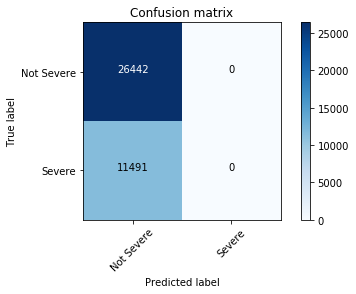

In [133]:
cnf_matrix_road = confusion_matrix(y_test_road, yhatLR_road)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix_road, classes=['Not Severe','Severe'],normalize= False,  title='Confusion matrix')

In [85]:
from sklearn.metrics import accuracy_score, f1_score, log_loss, classification_report, confusion_matrix, jaccard_similarity_score

road_LRyhat_accuracy = LR_road.predict(road_onehot_final)
road_LRyhat_prob_accuracy = LR_road.predict_proba(road_onehot_final)
print("Logistic Regression Jaccard index: %.2f" % jaccard_similarity_score(y_road, road_LRyhat_accuracy))
print("Logistic Regression F1-score: %.2f" % f1_score(y_road, road_LRyhat_accuracy, average='weighted') )
print("Logistic Regression Log-Loss index: %.2f" % log_loss(y_road, road_LRyhat_prob_accuracy))

Logistic Regression Jaccard index: 0.70
Logistic Regression F1-score: 0.57
Logistic Regression Log-Loss index: 0.60


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [105]:
feature_df = full_df[['SEVERITYCODE', 'ST_COLDESC', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]

In [106]:
feature_df['SEVERITYCODE'].replace(1, 0, inplace = True)
feature_df['SEVERITYCODE'].replace(2, 1, inplace = True)
feature_df.dropna(inplace = True)
feature_df.shape

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


(189316, 5)

In [110]:
feature_onehot = feature_df.copy()
feature_onehot = pd.concat([feature_onehot, pd.get_dummies(feature_onehot['ST_COLDESC'])], axis=1)
feature_onehot.drop(['ST_COLDESC'], axis = 1, inplace = True)
feature_onehot.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,All Other Multi Vehicle,All other non-collision,Breakage of any part of the vehicle resulting in injury or in further property damage,"Domestic animal other (cat, dog, etc)",Entering at angle,Fire started in vehicle,...,Vehicle Strikes Pedalcyclist,Vehicle Strikes Railway Vehicle,Vehicle Struck by City Road or Construction Machinery,Vehicle Struck by Other Road or Construction Machinery,Vehicle backing hits pedestrian,Vehicle going straight hits pedestrian,Vehicle hits Pedestrian - All Other Actions,Vehicle overturned,Vehicle turning left hits pedestrian,Vehicle turning right hits pedestrian
0,1,Overcast,Wet,Daylight,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,Raining,Wet,Dark - Street Lights On,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,Overcast,Dry,Daylight,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,Clear,Dry,Daylight,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,Raining,Wet,Daylight,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
feature_onehot = pd.concat([feature_onehot, pd.get_dummies(feature_onehot['WEATHER'])], axis=1)
feature_onehot.drop(['WEATHER'], axis = 1, inplace = True)
feature_onehot.head()

,SEVERITYCODE,ROADCOND,LIGHTCOND,All Other Multi Vehicle,All other non-collision,Breakage of any part of the vehicle resulting in injury or in further property damage,"Domestic animal other (cat, dog, etc)",Entering at angle,Fire started in vehicle,Fixed object,...,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Unknown
0,1,Wet,Daylight,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,Wet,Dark - Street Lights On,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,Dry,Daylight,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,Dry,Daylight,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,Wet,Daylight,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [112]:
feature_onehot = pd.concat([feature_onehot, pd.get_dummies(feature_onehot['ROADCOND'])], axis=1)
feature_onehot.drop(['ROADCOND'], axis = 1, inplace = True)
feature_onehot.head()

,SEVERITYCODE,LIGHTCOND,All Other Multi Vehicle,All other non-collision,Breakage of any part of the vehicle resulting in injury or in further property damage,"Domestic animal other (cat, dog, etc)",Entering at angle,Fire started in vehicle,Fixed object,From opposite direction - all others,...,Unknown,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet
0,1,Daylight,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,Dark - Street Lights On,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,Daylight,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,Daylight,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,Daylight,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [113]:
feature_onehot = pd.concat([feature_onehot, pd.get_dummies(feature_onehot['LIGHTCOND'])], axis=1)
feature_onehot.drop(['LIGHTCOND'], axis = 1, inplace = True)
feature_onehot.head()

,SEVERITYCODE,All Other Multi Vehicle,All other non-collision,Breakage of any part of the vehicle resulting in injury or in further property damage,"Domestic animal other (cat, dog, etc)",Entering at angle,Fire started in vehicle,Fixed object,From opposite direction - all others,From opposite direction - both going straight - one stopped - sideswipe,...,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Unknown
0,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [114]:
feature_onehot_final = feature_onehot.copy()
feature_onehot_final.drop(['SEVERITYCODE'], axis = 1, inplace = True)
feature_onehot_final[0:5]

,All Other Multi Vehicle,All other non-collision,Breakage of any part of the vehicle resulting in injury or in further property damage,"Domestic animal other (cat, dog, etc)",Entering at angle,Fire started in vehicle,Fixed object,From opposite direction - all others,From opposite direction - both going straight - one stopped - sideswipe,From opposite direction - both going straight - sideswipe,...,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Unknown
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [115]:
x_feature = feature_onehot_final
x_feature = preprocessing.StandardScaler().fit_transform(x_feature)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [116]:
y_feature = feature_onehot["SEVERITYCODE"].values
y_feature[0:5]

array([1, 0, 0, 0, 1])

In [117]:
from sklearn.model_selection import train_test_split

x_train_feature, x_test_feature, y_train_feature, y_test_feature = train_test_split(x_feature, y_feature, test_size=0.2, random_state=4)

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR_feature = LogisticRegression(C = 0.01, class_weight = 'balanced', solver = 'liblinear').fit(x_train_feature, y_train_feature)

In [123]:
yhatLR_feature = LR_feature.predict(x_test_feature)
yhat_prob_feature = LR_feature.predict_proba(x_test_feature)

Confusion matrix, without normalization
[[16876  9519]
 [ 2407  9062]]


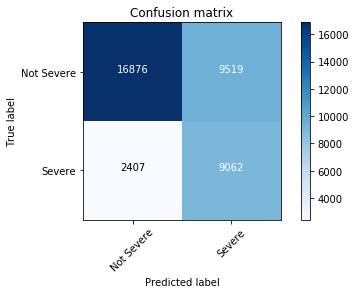

In [132]:
cnf_matrix_feature = confusion_matrix(y_test_feature, yhatLR_feature)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix_feature, classes=['Not Severe','Severe'],normalize= False,  title='Confusion matrix')

In [127]:
from sklearn.metrics import accuracy_score, f1_score, log_loss, classification_report, confusion_matrix, jaccard_similarity_score

feature_LRyhat_accuracy = LR_feature.predict(feature_onehot_final)
feature_LRyhat_prob_accuracy = LR_feature.predict_proba(feature_onehot_final)
print("Logistic Regression Jaccard index: %.2f" % jaccard_similarity_score(y_feature, feature_LRyhat_accuracy))
print("Logistic Regression F1-score: %.2f" % f1_score(y_feature, feature_LRyhat_accuracy, average='weighted') )
print("Logistic Regression Log-Loss index: %.2f" % log_loss(y_feature, feature_LRyhat_prob_accuracy))

Logistic Regression Jaccard index: 0.71
Logistic Regression F1-score: 0.71
Logistic Regression Log-Loss index: 0.58
